# Analyzing Austin PD's Crime Reports Dataset

I downloaded the latest copy of the dataset from data.austintexas.gov on 7/23/2020. The exported dataset seems to contain more data to work with than if one were to utilize the API, even if it is not continuously up-to-date. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets\crime_reports.csv', parse_dates=True)

## Cleaning the data

In [3]:
pd.set_option('display.max_columns', None)

# Examining the dataset
display(df.head())
print('----------------------------------')
display(df.tail())
print('----------------------------------')
display(df.columns)
print('----------------------------------')
display(df.isnull().sum())

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20183000009,DATING DISTURBANCE,2400,N,10/27/2018 12:03:00 AM,10/27/2018,3.0,10/27/2018 12:28:00 AM,10/27/2018,28.0,PARKING LOTS / GARAGE,2201 MONTOPLOIS DR,NaN,NaN,NaN,NaN,NaN,NaN,N,10/31/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20141381413,FAMILY DISTURBANCE,3400,N,05/18/2014 07:09:00 PM,05/18/2014,1909.0,05/18/2014 07:09:00 PM,05/18/2014,1909.0,RESIDENCE / HOME,12836 BUENOS ARIES PKWY,NaN,NaN,NaN,NaN,NaN,NaN,N,05/26/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20081002040,CRASH/FAIL STOP AND RENDER AID,3604,N,04/09/2008 07:04:00 PM,04/09/2008,1904.0,04/09/2008 09:08:00 PM,04/09/2008,2108.0,STREETS / HWY / ROAD / ALLEY,2500 BLOCK OF GUADALUPE,NaN,NaN,NaN,NaN,NaN,NaN,N,12/16/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20161971680,DWI,2100,N,07/15/2016 10:15:00 PM,07/15/2016,2215.0,07/16/2016 12:22:00 AM,07/16/2016,22.0,STREETS / HWY / ROAD / ALLEY,6000 BLK OF BOLM RD,NaN,NaN,NaN,NaN,NaN,NaN,C,01/03/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20135029070,PROTECTIVE ORDER,3829,N,06/28/2013 12:15:00 PM,06/28/2013,1215.0,06/28/2013 12:15:00 PM,06/28/2013,1215.0,RESIDENCE / HOME,COHISE COUNTY AZ,NaN,NaN,NaN,NaN,NaN,NaN,N,06/28/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2252085,20175007735,HARASSMENT,2703,N,01/31/2017 10:31:00 AM,01/31/2017,1031.0,02/23/2017 10:31:00 AM,02/23/2017,1031.0,RESIDENCE / HOME,9802 ROXANNA DR,78748.0,5.0,FR,1,535,17.47,N,03/16/2017,NaN,NaN,3088221.0,3088221.0,30.176236,-97.827862,"(30.17623555, -97.82786218)"
2252086,20108800371,CRIMINAL TRESPASS/TRANSIENT,2721,N,03/29/2010 07:17:00 AM,03/29/2010,717.0,03/29/2010 07:17:00 AM,03/29/2010,717.0,CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,203 E 10TH ST,78701.0,9.0,GE,1,379,11.00,N,03/30/2010,NaN,NaN,3115283.0,3115283.0,30.271040,-97.739653,"(30.27103998, -97.73965326)"
2252087,2003924076801,BURGLARY OF RESIDENCE,500,N,01/04/2003 06:30:00 PM,01/04/2003,1830.0,01/05/2003 10:31:00 AM,01/05/2003,1031.0,RESIDENCE / HOME,1809 SANCHEZ ST,78702.0,1.0,CH,3,394,8.00,N,NaN,220,Burglary,3125587.0,3125587.0,30.281489,-97.706719,"(30.28148881, -97.70671938)"
2252088,2006902409,BURGLARY NON RESIDENCE,502,N,03/31/2006 10:46:00 PM,03/31/2006,2246.0,03/31/2006 10:46:00 PM,03/31/2006,2246.0,COMMERCIAL / OFFICE BUILDING,6016 OLD FREDERICKSBURG RD,78749.0,8.0,DA,6,78,NaN,NaN,05/10/2006,220,Burglary,3081299.0,3081299.0,30.234197,-97.848283,"(30.2341966, -97.8482829)"
2252089,2010232299,FAMILY DISTURBANCE,3400,N,01/23/2010 10:44:00 PM,01/23/2010,2244.0,01/24/2010 12:14:00 AM,01/24/2010,14.0,RESIDENCE / HOME,9307 GEORGIAN DR,78753.0,4.0,ED,1,250,18.00,N,02/06/2010,NaN,NaN,3129098.0,3129098.0,30.360317,-97.693437,"(30.36031662, -97.69343723)"


----------------------------------


Index(['Incident Number', 'Highest Offense Description',
       'Highest Offense Code', 'Family Violence', 'Occurred Date Time',
       'Occurred Date', 'Occurred Time', 'Report Date Time', 'Report Date',
       'Report Time', 'Location Type', 'Address', 'Zip Code',
       'Council District', 'APD Sector', 'APD District', 'PRA', 'Census Tract',
       'Clearance Status', 'Clearance Date', 'UCR Category',
       'Category Description', 'X-coordinate', 'Y-coordinate', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

----------------------------------


Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 165
Occurred Date                        0
Occurred Time                       84
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    20850
Address                             12
Zip Code                         13676
Council District                 46704
APD Sector                        8680
APD District                      9148
PRA                              10365
Census Tract                   1260915
Clearance Status                601426
Clearance Date                  332213
UCR Category                   1487894
Category Description           1487894
X-coordinate                      9783
Y-coordinate                      9783
Latitude                         37918
Longitude                

In [4]:
df.duplicated().sum()

0

In [5]:
# Dropping null values from 'Occurred Date Time', convert it to datetime64 & set it as the index
df.dropna(subset=['Occurred Date Time'], inplace=True)
df['Occurred Date Time'] = df['Occurred Date Time'].astype('datetime64')
df.set_index('Occurred Date Time', inplace=True)
df.sort_index(inplace=True)

# Dropping null 'zip code' values.
df.dropna(subset=['Zip Code'], inplace=True)

display(df.index)

DatetimeIndex(['2003-01-01 00:00:00', '2003-01-01 00:00:00',
               '2003-01-01 00:00:00', '2003-01-01 00:00:00',
               '2003-01-01 00:00:00', '2003-01-01 00:00:00',
               '2003-01-01 00:00:00', '2003-01-01 00:00:00',
               '2003-01-01 00:00:00', '2003-01-01 00:00:00',
               ...
               '2020-07-18 10:41:00', '2020-07-18 11:00:00',
               '2020-07-18 12:00:00', '2020-07-18 12:51:00',
               '2020-07-18 13:45:00', '2020-07-18 14:00:00',
               '2020-07-18 14:30:00', '2020-07-18 15:33:00',
               '2020-07-18 17:12:00', '2020-07-18 17:35:00'],
              dtype='datetime64[ns]', name='Occurred Date Time', length=2238262, freq=None)

## Exploratory Analysis

In [6]:
# Reexamining the head, tail, and nulls
display(df.head())
print('----------------------------------')
display(df.tail())
print('----------------------------------')
display(df.isnull().sum())

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
Occurred Date Time,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-01-01,20125023519,IDENTITY THEFT,4022,N,01/01/2003,0.0,05/25/2012 11:04:00 AM,05/25/2012,1104.0,RESIDENCE / HOME,1105 LILY TER,78741.0,3.0,HE,3,443,23.18,N,05/25/2012,NaN,NaN,3127515.0,3127515.0,30.234098,-97.701901,"(30.23409756, -97.70190149)"
2003-01-01,20125003299,IDENTITY THEFT,4022,N,01/01/2003,0.0,01/23/2012 09:41:00 AM,01/23/2012,941.0,SPECIALTY STORE (TV FUR ETC.),1533 CUTTING HORSE LN,78727.0,7.0,ED,4,193,NaN,N,01/23/2012,NaN,NaN,3131694.0,3131694.0,30.416668,-97.683656,"(30.41666837, -97.68365568)"
2003-01-01,20105018815,IDENTITY THEFT,4022,N,01/01/2003,0.0,04/14/2010 02:59:00 PM,04/14/2010,1459.0,RESIDENCE / HOME,1088 PARK PLZ,78753.0,4.0,ED,3,251,18.13,O,04/15/2010,NaN,NaN,3131784.0,3131784.0,30.348871,-97.685233,"(30.34887091, -97.6852326)"
2003-01-01,20135010506,IDENTITY THEFT,4022,N,01/01/2003,0.0,03/11/2013 05:28:00 PM,03/11/2013,1728.0,RESIDENCE / HOME,7001 S CONGRESS AVE,78745.0,2.0,FR,3,528,24.22,N,03/12/2013,NaN,NaN,3103212.0,3103212.0,30.188878,-97.780075,"(30.18887778, -97.78007456)"
2003-01-01,20035011395,FORGERY AND PASSING,1000,N,01/01/2003,0.0,09/13/2003 09:35:00 AM,09/13/2003,935.0,COMMERCIAL / OFFICE BUILDING,8501 BURNET RD,78757.0,7.0,ID,7,234,18.18,NaN,09/15/2003,NaN,NaN,3118239.0,3118239.0,30.366117,-97.727721,"(30.36611687, -97.72772066)"


----------------------------------


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
Occurred Date Time,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-18 14:00:00,20205027765,HARASSMENT,2703,N,07/18/2020,1400.0,07/18/2020 04:36:00 PM,07/18/2020,1636.0,RESIDENCE / HOME,4725 PALISADE DR,78731.0,10.0,BA,7,283,NaN,NaN,NaN,NaN,NaN,3100687.0,3100687.0,30.340587,-97.784066,"(30.34058747, -97.78406575)"
2020-07-18 14:30:00,20205027767,BURGLARY OF VEHICLE,601,N,07/18/2020,1430.0,07/18/2020 04:56:00 PM,07/18/2020,1656.0,PARKING LOTS / GARAGE,1700 W PARMER LN,78727.0,7.0,ED,4,193,NaN,NaN,NaN,23F,Theft,3130069.0,3130069.0,30.412825,-97.688918,"(30.41282461, -97.68891798)"
2020-07-18 15:33:00,20202000886,THEFT BY SHOPLIFTING,607,N,07/18/2020,1533.0,07/18/2020 03:33:00 PM,07/18/2020,1533.0,DEPARTMENT / DISCOUNT STORE,6631 TERRAVISTA DR,78735.0,8.0,DA,6,6201,NaN,C,07/18/2020,23C,Theft,3072091.0,3072091.0,30.255194,-97.876914,"(30.25519426, -97.87691364)"
2020-07-18 17:12:00,20205027769,IDENTITY THEFT,4022,N,07/18/2020,1712.0,07/18/2020 05:12:00 PM,07/18/2020,1712.0,RESIDENCE / HOME,10708 HENDON ST,78748.0,5.0,FR,1,100,NaN,NaN,NaN,NaN,NaN,3085664.0,3085664.0,30.165613,-97.836231,"(30.16561254, -97.83623075)"
2020-07-18 17:35:00,20205027770,IDENTITY THEFT,4022,N,07/18/2020,1735.0,07/18/2020 05:35:00 PM,07/18/2020,1735.0,RESIDENCE / HOME,12509 WHITE EAGLE RD,78739.0,8.0,FR,1,101,NaN,NaN,NaN,NaN,NaN,3080816.0,3080816.0,30.145542,-97.852090,"(30.14554162, -97.85209045)"


----------------------------------


Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date                        0
Occurred Time                        0
Report Date Time                     0
Report Date                          0
Report Time                          0
Location Type                    20385
Address                              0
Zip Code                             0
Council District                 33028
APD Sector                           8
APD District                        11
PRA                                 11
Census Tract                   1248010
Clearance Status                596990
Clearance Date                  329015
UCR Category                   1476359
Category Description           1476359
X-coordinate                         7
Y-coordinate                         7
Latitude                         27395
Longitude                        27395
Location                 

### Question 1. What areas of Austin have the highest crime rates? 

In [7]:
# Create dataframe for the top 10 zipcodes with the highest crime rates 
zip_codes = df['Zip Code'].value_counts().head(10)
display(zip_codes)

# Displaying the top 10 crime rates per zipcode as proportions
print('----------------------------------')
display(df['Zip Code'].value_counts(normalize=True).head(10))

78741.0    202959
78753.0    174340
78701.0    166322
78758.0    155255
78704.0    151583
78745.0    147665
78702.0    134741
78744.0    123550
78723.0    115836
78752.0     82999
Name: Zip Code, dtype: int64

----------------------------------


78741.0    0.090677
78753.0    0.077891
78701.0    0.074309
78758.0    0.069364
78704.0    0.067724
78745.0    0.065973
78702.0    0.060199
78744.0    0.055199
78723.0    0.051753
78752.0    0.037082
Name: Zip Code, dtype: float64

78741 has the highest amount of crime (9.07%) by 1.29 percentage points above 78753 which comes in second (7.79%). The next major decrease occurs between 78723 (5.18%) & 78752 (3.71%) with 1.47 percentage points. 

In [8]:
# Examining crime in the 78753 area
df_53 = df[df['Zip Code'] == 78753]


# Create a dataframe for the top 10 crime categories in 78753
df_53_off = df_53['Highest Offense Description'].value_counts().head(10)
print('----------------------------------')
print('Distribution of Crime in 78753 (Top 10)')
print('----------------------------------')
display(df_53_off)
print('----------------------------------')
# Displaying them as percentages
display(df_53['Highest Offense Description'].value_counts(normalize=True).head(10))

----------------------------------
Distribution of Crime in 78753 (Top 10)
----------------------------------


THEFT                             16837
BURGLARY OF VEHICLE               15623
FAMILY DISTURBANCE                14204
CRIMINAL MISCHIEF                  9150
THEFT BY SHOPLIFTING               7459
ASSAULT W/INJURY-FAM/DATE VIOL     6986
BURGLARY OF RESIDENCE              5976
DWI                                4783
DISTURBANCE - OTHER                4651
CUSTODY ARREST TRAFFIC WARR        4301
Name: Highest Offense Description, dtype: int64

----------------------------------


THEFT                             0.096576
BURGLARY OF VEHICLE               0.089612
FAMILY DISTURBANCE                0.081473
CRIMINAL MISCHIEF                 0.052484
THEFT BY SHOPLIFTING              0.042784
ASSAULT W/INJURY-FAM/DATE VIOL    0.040071
BURGLARY OF RESIDENCE             0.034278
DWI                               0.027435
DISTURBANCE - OTHER               0.026678
CUSTODY ARREST TRAFFIC WARR       0.024670
Name: Highest Offense Description, dtype: float64

In [9]:
# Create a dataframe for crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df['Zip Code'] == 78741]

# Create a dataframe for the top 10 crime categories in the zipcode
df_41_off = df_41['Highest Offense Description'].value_counts().head(10)

print('----------------------------------')
print('Distribution of Crime in 78741 (Top 10)')
print('----------------------------------')
display(df_41_off)
# Displaying the categories as proportions
print('----------------------------------')
display(df_41['Highest Offense Description'].value_counts(normalize=True).head(10))

----------------------------------
Distribution of Crime in 78741 (Top 10)
----------------------------------


FAMILY DISTURBANCE                19865
BURGLARY OF VEHICLE               19540
THEFT                             15336
CRIMINAL MISCHIEF                 10830
ASSAULT W/INJURY-FAM/DATE VIOL     9509
BURGLARY OF RESIDENCE              8757
PUBLIC INTOXICATION                6351
CUSTODY ARREST TRAFFIC WARR        6011
DWI                                5596
HARASSMENT                         5390
Name: Highest Offense Description, dtype: int64

----------------------------------


FAMILY DISTURBANCE                0.097877
BURGLARY OF VEHICLE               0.096276
THEFT                             0.075562
CRIMINAL MISCHIEF                 0.053361
ASSAULT W/INJURY-FAM/DATE VIOL    0.046852
BURGLARY OF RESIDENCE             0.043147
PUBLIC INTOXICATION               0.031292
CUSTODY ARREST TRAFFIC WARR       0.029617
DWI                               0.027572
HARASSMENT                        0.026557
Name: Highest Offense Description, dtype: float64

### Question 2. How are violent crimes, in particular murder and rape, distributed? 

----------------------------------
Murders (Top 10 Zip Codes)
----------------------------------


78741.0    42
78753.0    38
78758.0    36
78723.0    32
78744.0    27
78702.0    24
78752.0    21
78745.0    20
78704.0    16
78701.0    15
Name: Zip Code, dtype: int64

----------------------------------


78741.0    0.110236
78753.0    0.099738
78758.0    0.094488
78723.0    0.083990
78744.0    0.070866
78702.0    0.062992
78752.0    0.055118
78745.0    0.052493
78704.0    0.041995
78701.0    0.039370
Name: Zip Code, dtype: float64

----------------------------------
Capital Murders (Top 10 Zip Codes)
----------------------------------


78723.0    11
78753.0    11
78758.0     7
78741.0     7
78745.0     6
78752.0     6
78744.0     4
78748.0     3
78721.0     3
78702.0     3
Name: Zip Code, dtype: int64

----------------------------------


78723.0    0.141026
78753.0    0.141026
78758.0    0.089744
78741.0    0.089744
78745.0    0.076923
78752.0    0.076923
78744.0    0.051282
78748.0    0.038462
78721.0    0.038462
78702.0    0.038462
Name: Zip Code, dtype: float64

----------------------------------
Rape (Top 10 Zipcodes)
----------------------------------


78741.0    497
78753.0    354
78701.0    350
78758.0    310
78745.0    273
78704.0    240
78705.0    205
78744.0    203
78723.0    194
78702.0    181
Name: Zip Code, dtype: int64

----------------------------------


78741.0    0.121160
78753.0    0.086299
78701.0    0.085324
78758.0    0.075573
78745.0    0.066553
78704.0    0.058508
78705.0    0.049976
78744.0    0.049488
78723.0    0.047294
78702.0    0.044125
Name: Zip Code, dtype: float64

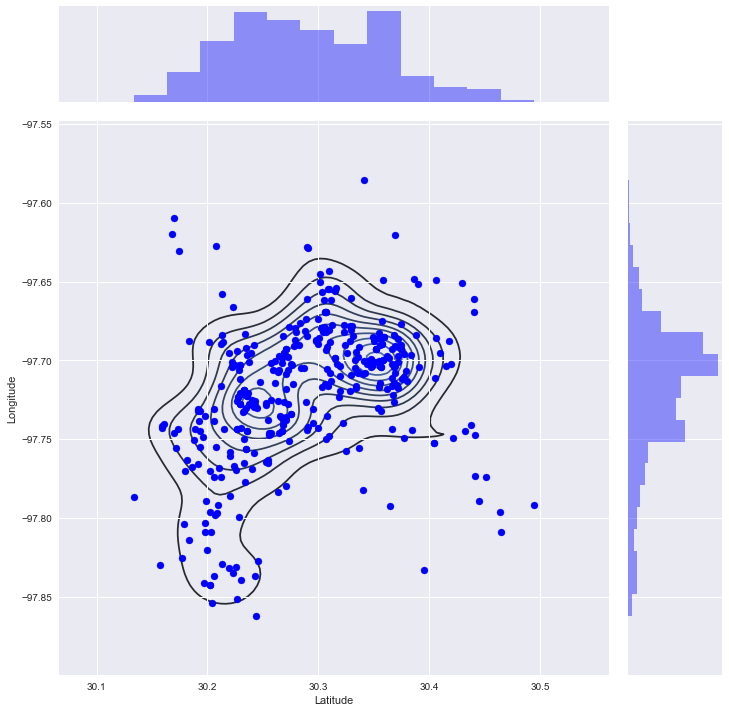

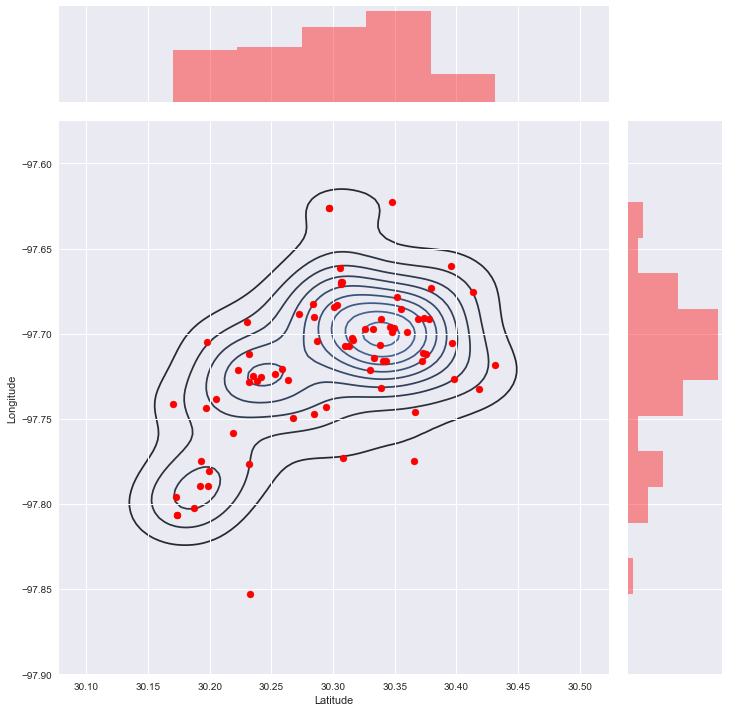

In [10]:
# Create a dataframe for murders & capital murders
df_mur = df[df['Highest Offense Description'] == 'MURDER']
df_mur_cap = df[df['Highest Offense Description'] == 'CAPITAL MURDER']
df_rape = df[df['Highest Offense Description'] == 'RAPE']

# What are the top 10 zipcodes for murders? 
print('----------------------------------')
print('Murders (Top 10 Zip Codes)')
print('----------------------------------')
df_mur_val = df_mur['Zip Code'].value_counts().head(10)
display(df_mur_val)
print('----------------------------------')
display(df_mur['Zip Code'].value_counts(normalize=True).head(10))

# What are the top 10 zipcodes for capital murders? 
print('----------------------------------')
print('Capital Murders (Top 10 Zip Codes)')
print('----------------------------------')
df_mur_cap_val = df_mur_cap['Zip Code'].value_counts().head(10)
display(df_mur_cap_val)
print('----------------------------------')
display(df_mur_cap['Zip Code'].value_counts(normalize=True).head(10))

# What are the top 10 zipcodes for rape? 
print('----------------------------------')
print('Rape (Top 10 Zipcodes)')
print('----------------------------------')
df_rape_val = df_rape['Zip Code'].value_counts().head(10)
display(df_rape_val)
print('----------------------------------')
display(df_rape['Zip Code'].value_counts(normalize=True).head(10))

# Plotting the two murder dataframes latitude and longitude. The rape dataframe cannot be plotted since it contains no coordinates.
sns.jointplot("Latitude", "Longitude", data=df_mur, color='b', height=10).plot_joint(sns.kdeplot, zorder=0, n_levels=10), 
sns.jointplot("Latitude", "Longitude", data=df_mur_cap, color='r', height=10).plot_joint(sns.kdeplot, zorder=0, n_levels=10)

Needless to say, 78753 and 78741 are the top hotspots for crime in Austin, including violent crime!!